In [1]:
from __future__ import print_function, division
from builtins import range

In [1]:
import gym 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_action(s,w):
    return 1 if s.dot(w)>0 else 0

In [3]:
def play_one_episode(env, params):
    observation = env.reset()
    done = False
    t = 0
    
    while not done and t<10000:
        t +=1
        action = get_action(observation, params)
        observation, rewards, done, info = env.step(action)
        if done: 
            break
    return t

In [7]:
def play_multiple_episodes(env, T, params):
    episode_lengths = np.empty(T)
    for i in range(T):
        episode_lengths[i]=play_one_episode(env, params)
    
    avg_length = episode_lengths.mean()
    #print("avg length: ", avg_length)
    return avg_length
    
    

In [8]:
def random_search(env):
    episode_length = []
    best = 0 
    params = None
    
    for t in range(100):
        new_params = np.random.random(4)*2-1
        avg_length = play_multiple_episodes(env, 100, new_params)
        episode_length.append(avg_length)
        
        if avg_length > best:
            params = new_params
            best = avg_length
    return episode_length, params
    
        

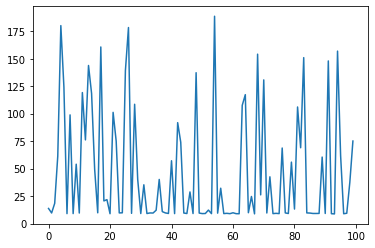

*** Final run with final weight ***


In [9]:
if __name__ == "__main__":
    env = gym.make("CartPole-v0")
    episode_lengths, params = random_search(env)
    plt.plot(episode_lengths)
    plt.show()
    
    
    #play final set of episodes
    
    print("*** Final run with final weight ***")
    play_multiple_episodes(env, 100, params)